/scratch/usertmp/ipykernel_266824/3490723705.py:15: RuntimeWarning: divide by zero encountered in log
  axs[0].scatter(np.arange(len(probs)), -np.log(1-probs), c=colors, s=0.5)


(array([  4619,  10551,  20030,  25916,  26662,  32007,  32808,  34208,
        41506,  43316,  52417,  55948,  56214,  58021,  59224,  63461,
        66658,  69913,  83609,  92883,  96389,  96489,  99740, 103445,
       111925, 112719, 113600, 114828, 117620, 126958, 128004, 129323,
       129328, 129333, 135311, 135374, 138321, 146278, 147555, 155175,
       157917, 159627, 160868, 164112, 164136, 171189, 171419, 171426,
       171461, 190408, 190421, 190431, 191279, 192371, 193837, 196330,
       200310, 206811, 208391, 209010, 216585, 217309, 217485, 219093,
       220059, 223058, 226182, 228066, 229647, 236851, 236988, 240217,
       245436, 249937, 251029, 254186, 254875, 255064, 257473, 257509,
       259815, 259860, 265915, 265928, 270698, 270920, 271810, 272877,
       275543, 277405, 284968, 284972, 296225, 308471, 312801, 314160,
       314176, 314191, 317840, 318231, 328110, 329522, 332168, 344606,
       347177, 347655, 349164, 349241, 349279, 349293, 349487, 351497,
     

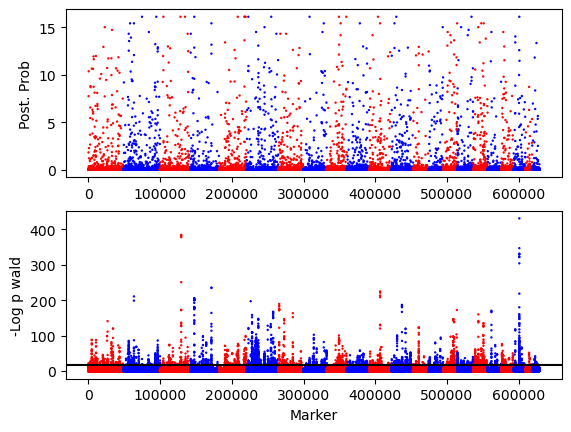

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('prs_bayesr_height.probs', sep=' ')
probs = np.array(df['Probability'])

marker_chrom = [int(loci[:loci.index(':')]) for loci in df['Predictor']]
colors = ['blue' if chrom % 2 == 0 else 'red' for chrom in marker_chrom]

#### make a figure with GWAS and Post.Prob ####

# Post. Prob Plot 
fig, axs = plt.subplots(2, 1)
axs[0].scatter(np.arange(len(probs)), -np.log(1-probs), c=colors, s=0.5)
axs[0].set_ylabel("Post. Prob")

print(np.where(probs == 1))

# Basic GWAS
p_critical = 5*10**(-8)
df = pd.read_csv('../LDAK_practice/basic_gwas/basic_gwas_result.txt.pvalues', sep=' ')
p_vals = -np.log(np.array(df['P']))
marker_chrom = [int(loci[:loci.index(':')]) for loci in  df['Predictor']]
colors = ['blue' if chrom % 2 == 0 else 'red' for chrom in marker_chrom]

axs[1].scatter(np.arange(len(p_vals)),p_vals, c=colors, s=0.5)
axs[1].axhline(y=-np.log(p_critical), color='black', linestyle='-')
axs[1].set_xlabel("Marker")
axs[1].set_ylabel("-Log p wald")
plt.savefig('BayesR_Post.png')



Zooming in on a GWAS Spike

628694 628694


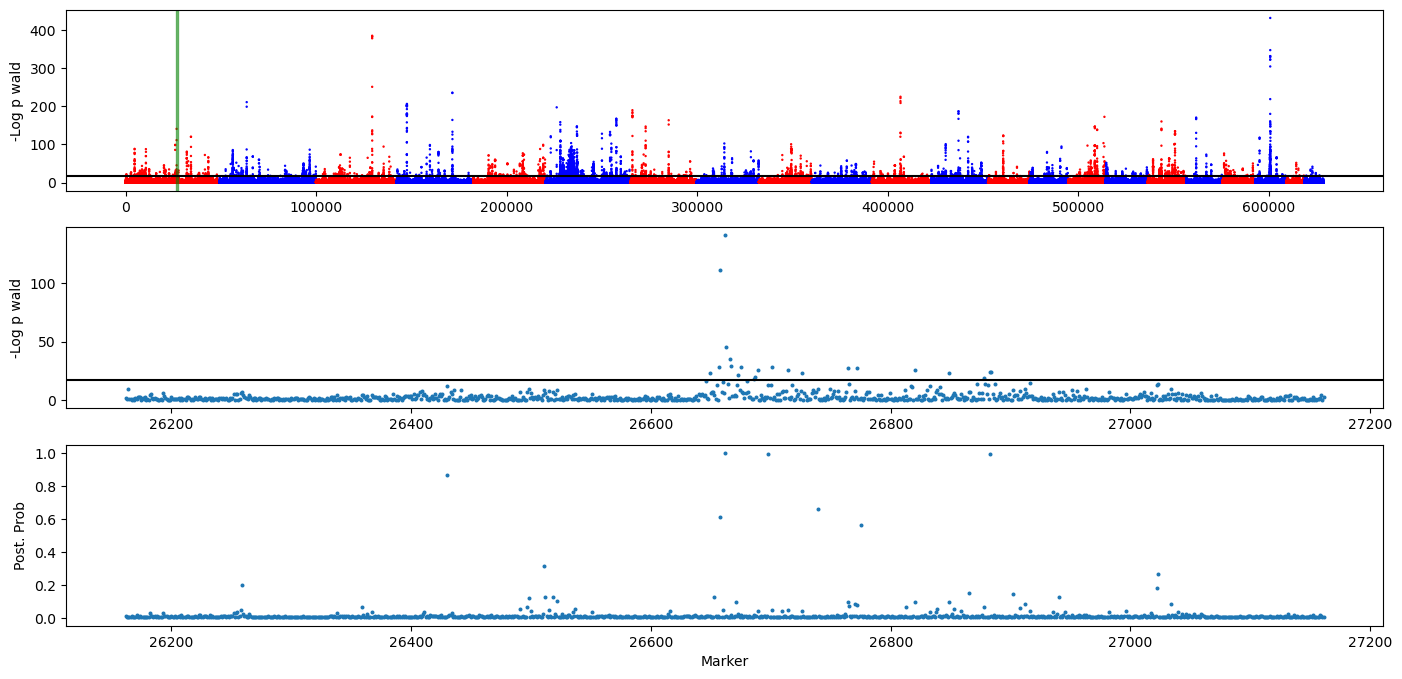

In [39]:
# zooming in on hte biggest assiocation

markers_examined = 1000

fig, axs = plt.subplots(3, 1, figsize=(17,8))
point_size = 3.5

# Find Peak from GWAS
df = pd.read_csv('../LDAK_practice/basic_gwas/basic_gwas_result.txt.pvalues', sep=' ')
p_vals = -np.log(np.array(df['P']))
num_p_vals = len(p_vals)

search_area_s, search_area_f = 1000, 60000
big_SNP_location = search_area_s + np.argmax(p_vals[search_area_s:search_area_f])

domain_start = int(max(0, big_SNP_location - markers_examined/2))
domain_end = int(min(len(p_vals), big_SNP_location + markers_examined/2))

# Basic GWAS
p_critical = 5*10**(-8)
marker_chrom = [int(loci[:loci.index(':')]) for loci in  df['Predictor']]
colors = ['blue' if chrom % 2 == 0 else 'red' for chrom in marker_chrom]

axs[0].scatter(np.arange(len(p_vals)),p_vals, c=colors, s=0.5)
axs[0].axhline(y=-np.log(p_critical), color='black', linestyle='-')
axs[0].set_ylabel("-Log p wald")
axs[0].axvspan(domain_start, domain_end, color='green', alpha=0.5)

p_vals = p_vals[domain_start:domain_end]
# GWAS Plot
axs[1].scatter(domain_start+np.arange(len(p_vals)),p_vals , s=point_size)
axs[1].axhline(y=-np.log(p_critical), color='black', linestyle='-')
axs[2].set_xlabel("Marker")
axs[1].set_ylabel("-Log p wald")

#### Post. Prob Plot####
df = pd.read_csv('prs_bayesr_height.probs', sep=' ')
num_post_prob = len(df)
df = df[domain_start:domain_end]
probs = np.array(df['Probability'])
axs[2].scatter(domain_start+np.arange(len(probs)), probs, s=point_size)
axs[2].set_ylabel("Post. Prob")

print(num_post_prob, num_p_vals)
plt.savefig('BayesR_Post.png')